In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

In [2]:
# Завантажуємо дані
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv', sep=None, engine='python')

# Виволимо розмір датасету
df.shape


(5110, 12)

In [36]:
warnings.filterwarnings("ignore")

In [3]:
# Виводимо перші 10 рядків, аби попередньо ознайомитись із записами в датафреймі
df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [5]:
# Checking for NULL values
print("Missing values:")
print(df.isnull().sum())

Missing values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
# Changing missing values in bmi column with the mean value
num_cols = df.select_dtypes(include=["Int64", "float"]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace= True)


In [7]:
# Checking for duplicates
print("Duplicated values:")
print(df.duplicated().sum())


Duplicated values:
0


In [17]:
# The describtion of basic information about the values
stats = df[['age', 'avg_glucose_level', 'bmi']].describe()
stats.round(2)


,age,avg_glucose_level,bmi
count,5110.00,5110.00,5110.00
mean,43.23,106.15,28.86
std,22.61,45.28,7.70
min,0.08,55.12,10.30
25%,25.00,77.24,23.80
50%,45.00,91.88,28.10
75%,61.00,114.09,32.80
max,82.00,271.74,97.60


In [15]:
# Визначимо категоріальні колонки
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# Checking for unique values in categorical columns 
df[cat_cols].nunique()


gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [16]:
# Converting categorical values into categories for memory efficiency
df[cat_cols] = df[cat_cols].astype('category')


In [20]:
# Standardization of column names
df.columns = df.columns.str.lower()
print("Lowercase Columns:", df.columns)


Lowercase Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [22]:
# Creating new groups for bmi column based on medical categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"
df['bmi_category'] = df['bmi'].apply(bmi_category)


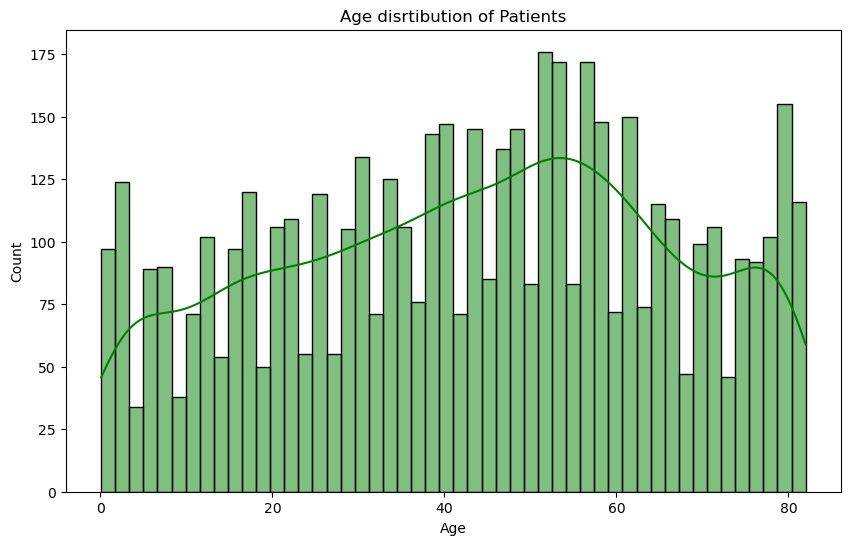

In [39]:
# Age distribution of Patients
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=50, kde=True, color="green")
plt.title('Age disrtibution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


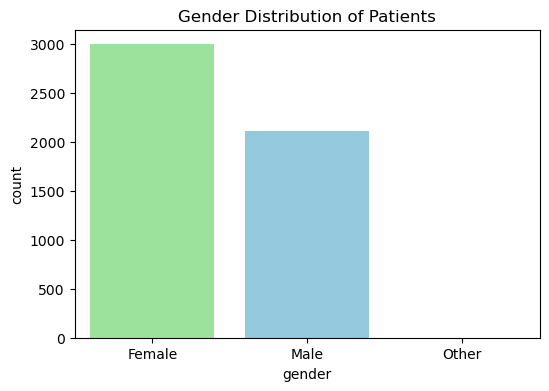

In [49]:
# Gender distribution of Patients
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, palette=("lightgreen", "skyblue"))
plt.title("Gender Distribution of Patients")
plt.show()


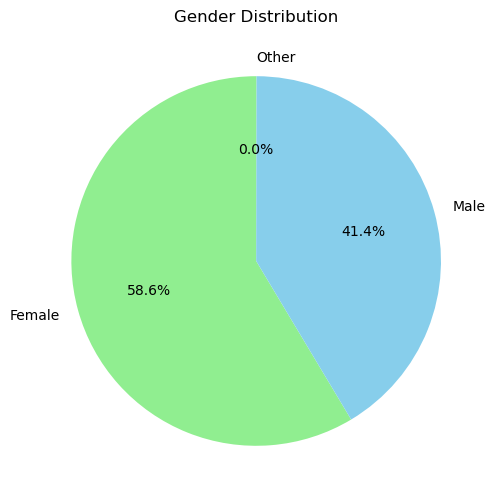

In [52]:
# Gender distribution of Patients
gender_counts = df['gender'].value_counts()

colors = ['lightgreen', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Gender Distribution")
plt.show()